In [65]:
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import sklearn.cluster as cluster
import sklearn.model_selection as selection
import sklearn.metrics as metrics
import numpy as np
from numpy.typing import NDArray
import random
from typing import *

# Задание 1

In [66]:
data_1 = skdata.make_blobs(25, 2, centers=2, cluster_std=0.8, random_state=14)
data_2 = skdata.make_blobs(100, 2, centers=3, cluster_std=1, random_state=14)
data_3 = skdata.make_blobs(350, 2, centers=4, cluster_std=1.35, random_state=14)
blobs_list: tuple[tuple[NDArray, NDArray]] = (data_1, data_2, data_3)

# Задание 2

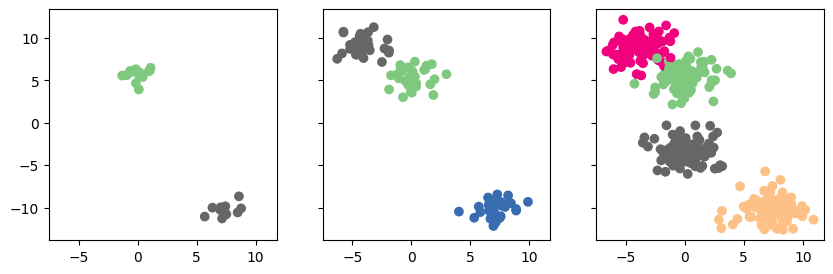

In [67]:
figure, _ = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3))
for data, axis in zip(blobs_list, figure.axes):
    axis.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap="Accent")

plt.show()

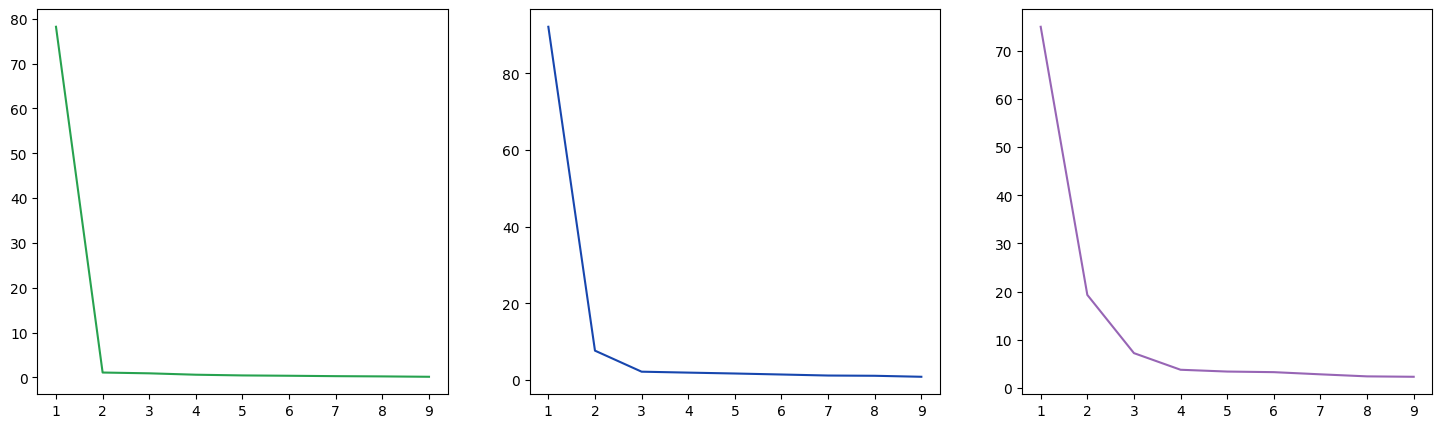

In [68]:
results_list: list[dict[int, float]] = list()

for i, data in enumerate(blobs_list):
    parameters_grid = selection.ParameterGrid({"n_clusters": np.arange(1, 10)})
    results_list.append(dict())
    results = results_list[-1]
    for params in parameters_grid:
        model = cluster.KMeans(n_init="auto", **params).fit(data[0])
        internal_cluster_distance_sum: float
        prediction = model.predict(data[0])
        centroids_per_object: list[NDArray] = [model.cluster_centers_[class_] for class_ in prediction]
        score: float = np.power(metrics.pairwise.paired_euclidean_distances(data[0], centroids_per_object), 2).mean()
        results.update({params.get("n_clusters"): score})


figure, _ = plt.subplots(1, 3, figsize=(18, 5))
for data, axis, results in zip(blobs_list, figure.axes, results_list):
    color = "Accent"
    axis.plot(results.keys(), results.values(), color=[random.randint(20, 200) / 255 for _ in range(3)], )

plt.show()

По графикам зависимости суммы квадратов расстояний до центроидов от количества кластеров:

1: 2 кластера

2: 2 кластера (или 3)

3: 3 кластера (или 4)

In [69]:
'''def min_max_score(data: NDArray, centroids_per_object: list[NDArray], prediction: NDArray, clusters: int) -> float:
    internal_mean_centroid_distance: float = metrics.pairwise.paired_euclidean_distances(data, centroids_per_object).mean()
    if np.unique(prediction).shape[0] == clusters:
        internal_mean_max_objects_distance: float = np.mean([metrics.pairwise.euclidean_distances(data[prediction == cluster],\
            data[prediction == cluster]).max()
            for cluster in np.unique(prediction)])
    else: # if there are empty clusters
        internal_mean_max_objects_distance = 0
            
    score = float(internal_mean_centroid_distance / internal_mean_max_objects_distance)
    return score''' # 🤔

models: list[cluster.KMeans] = list()
predictions: list[NDArray] = list()
for i, data in enumerate(blobs_list, start=1):
    parameters_grid = selection.ParameterGrid({"n_clusters": np.arange(2, 10)})
    best_model: cluster.KMeans = None
    best_score: float = None
    best_prediction: NDArray = None
    for params in parameters_grid:
        model = cluster.KMeans(n_init="auto", **params).fit(data[0])
        internal_cluster_distance_sum: float
        prediction = model.predict(data[0])
        centroids_per_object: list[NDArray] = [model.cluster_centers_[class_] for class_ in prediction]
        score = metrics.silhouette_score(data[0], prediction)
        if best_score == None or score > best_score:
            best_model, best_score, best_prediction = model, score, prediction
    models.append(best_model)
    predictions.append(best_prediction)
    print(f"{i}: {best_model.get_params()['n_clusters']} clusters, score: {best_score}")

0: 2 clusters, score: 0.9226202594578196
1: 2 clusters, score: 0.8320871671643647
2: 3 clusters, score: 0.6719540560148428


In [70]:
model.cluster_centers_

array([[ -2.70248138,   9.08480087],
       [  8.18341493,  -9.74186036],
       [ -1.08415623,  -2.31537427],
       [  0.06517961,   5.23911368],
       [  5.85328073, -10.73367837],
       [ -0.66976478,  -4.56420398],
       [  1.5416975 ,  -4.4135717 ],
       [ -4.98304456,   8.42007585],
       [  1.29218176,  -2.35789851]])

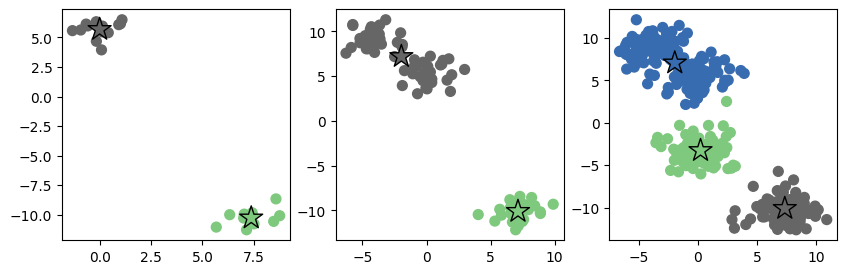

In [71]:
figure, _ = plt.subplots(1, 3, figsize=(10, 3))
for data, prediction, model, axis in zip(blobs_list, predictions, models, figure.axes, strict=True):
    axis.scatter(data[0][:, 0], data[0][:, 1], s=50, c=prediction, cmap="Accent")
    axis.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, cmap="Accent", marker="*", edgecolors="black", c=range(model.cluster_centers_.shape[0]))

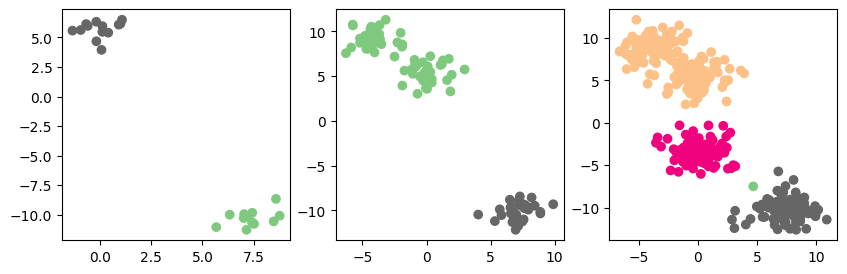

In [72]:
# models: list[cluster.DBSCAN] = list()
predictions: list[NDArray] = list()
for i, data in enumerate(blobs_list):
    #parameters_grid = selection.ParameterGrid({"n_clusters": np.arange(2, 10)})
    #best_model: cluster.KMeans = None
    #best_score: float = None
    #best_prediction: NDArray = None
    #for params in parameters_grid:
    #    model = cluster.KMeans(n_init="auto", **params).fit(data[0])
    #    internal_cluster_distance_sum: float
    #    prediction = model.predict(data[0])
    #    centroids_per_object: list[NDArray] = [model.cluster_centers_[class_] for class_ in prediction]
    #    score = metrics.silhouette_score(data[0], prediction)
    #    if best_score == None or score > best_score:
    #        best_model, best_score, best_prediction = model, score, prediction
    # models.append(cluster.DBSCAN().fit(data[0]))
    predictions.append(cluster.DBSCAN(eps=1.8).fit_predict(data[0]))
    #print(f"{i}: {best_model.get_params()['n_clusters']} clusters, score: {best_score}")

figure, _ = plt.subplots(1, 3, figsize=(10, 3))
for data, prediction, axis in zip(blobs_list, predictions, figure.axes, strict=True):
    axis.scatter(data[0][:, 0], data[0][:, 1], c=prediction, cmap="Accent")